# **Programming for Data Analytics Project: Decades of Music**

In this project I will import an open source CSV downloaded from [Kaggle](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-1921-2020-160k-tracks) which includes Spotify audio features data on 160,000+ tracks ranging from 1921 to 2020.

I will use the key principles thought in the programming for data analytics module such as pandas dataframes, data visualisation with matplotlib, random number generation and regular expressions to conduct an analysis of this dataset.

***
## Libraries:



In [93]:
# Data frames
import pandas as pd

# Plotting
import matplotlib.pyplot as plt

# Regular Expressions
import re

# Counter
from collections import Counter

***
## Importing the Data:

I downloaded the open source dataset used in this project from Kaggle and saved the file as a CSV within my repository. I will use pandas to read that CSV and then print the first few rows to check how the data is structured.

In [94]:
df = pd.read_csv("spotify_data.csv")
 
df.columns = ["valence", "year", "acousticness", "artists", "danceability", "duration_ms", "energy", "explicit", "id",
              "instrumentalness", "key", "liveness", "loudness", "mode", "name", "popularity", "release_date", "speechiness", "tempo"]

print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0 

Evidently, we are getting a wide range of variables within this dataset- each detailing the various audio qualities of the songs included in it.

Let's start off our analysis by producing some descriptive statistics for the date range of the tracks and then checking what the 10 most popular tracks are across the entire dataset. 

In [95]:
summary_stats = df["year"].describe().round(0)
print(f'Summary Statistics for Song Years:{summary_stats}')

most_popular_tracks = df.nlargest(5, "popularity")[["artists", "name", "year", "popularity"]]
print(f'5 Most Popular Tracks:{most_popular_tracks}')

Summary Statistics for Song Years:count    170653.0
mean       1977.0
std          26.0
min        1921.0
25%        1956.0
50%        1977.0
75%        1999.0
max        2020.0
Name: year, dtype: float64
5 Most Popular Tracks:                                  artists                             name  \
19611        ['Bad Bunny', 'Jhay Cortez']                           Dakiti   
19606           ['24kGoldn', 'iann dior']           Mood (feat. iann dior)   
19618                             ['BTS']                         Dynamite   
19608  ['Cardi B', 'Megan Thee Stallion']  WAP (feat. Megan Thee Stallion)   
19610                   ['Ariana Grande']                        positions   

       year  popularity  
19611  2020         100  
19606  2020          99  
19618  2020          97  
19608  2020          96  
19610  2020          96  


***
## Comparing Music by Decade:

To compare the music included in this dataset by decade we will need to group the years accordingly (ie. 1990 to 1999, etc.). I will make a function to group them and then add a new column to our dataframe so that we can easily analyse the data by decade.

I will do a quick validity check to see how many songs are included from each decade and then let's see what the most popular track is for each decade.

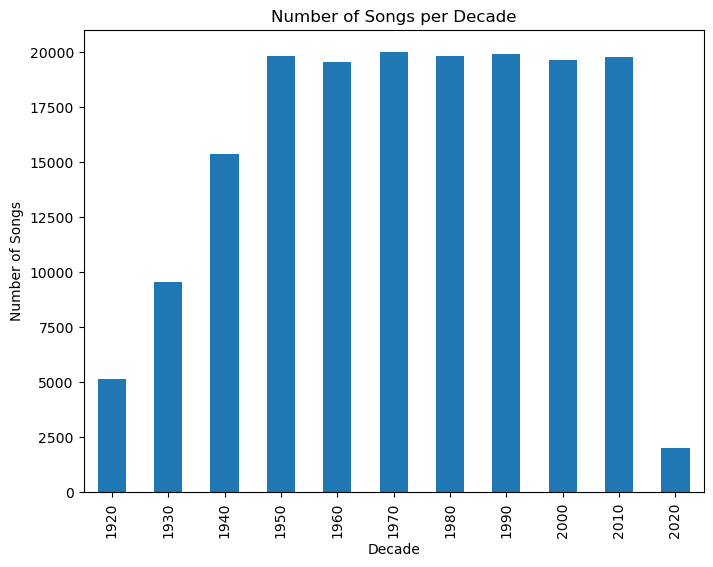


Most Popular Songs Each Decade:
       decade                                            name  \
1406     1920                                  Mack the Knife   
2206     1930  All of Me (with Eddie Heywood & His Orchestra)   
4006     1940                                 White Christmas   
7406     1950          Let It Snow! Let It Snow! Let It Snow!   
8406     1960               Rockin' Around The Christmas Tree   
11006    1970                          Dreams - 2004 Remaster   
11606    1980                                   Back In Black   
14406    1990                 All I Want for Christmas Is You   
15606    2000                                          Yellow   
19407    2010                                Watermelon Sugar   
19611    2020                                          Dakiti   

                                                 artists  popularity  
1406                                 ['Louis Armstrong']          52  
2206                 ['Billie Holiday', 'Edd

In [96]:
def decade_function(year):
    return (year // 10) * 10
df["decade"] = df["year"].apply(decade_function)

decade_counts = df["decade"].value_counts().sort_index()

# Bar chart of number of songs per decade
plt.figure(figsize=(8, 6))
decade_counts.plot(kind="bar", title="Number of Songs per Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Songs")
plt.show()

# Listing the most popular song each decade
most_popular_per_decade = df.loc[df.groupby("decade")["popularity"].idxmax()][["decade", "name", "artists", "popularity"]]
print("\nMost Popular Songs Each Decade:")
print(most_popular_per_decade)

It looks like the dataset is somewhat lacking for the first three decades of the 20th century and very sparse for the 2020's (this would make sense as in 2024 we are less than half way through the decade). Otherwise, we have a solid spread of roughly 20,000 tracks per decade from the 1950's into the 2010's.

Lot's of Christmas songs reach the top spots per decade! It's interesting to see how the popularity of jazz gives way to rock and then to modern pop. Of course, Spotify only came around in 2008 so the popularity of these tracks are heavily weighted towards the tastes of listeners since the turn of the century, further, this dataset is just a selection of songs and not all of Spotify's data.

Now let's produce some more visualisations checking out danceability, song length and the number of explicit tracks.

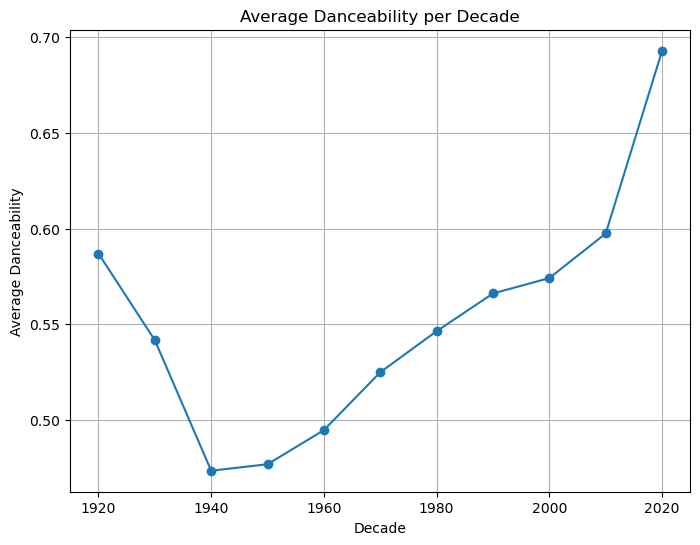

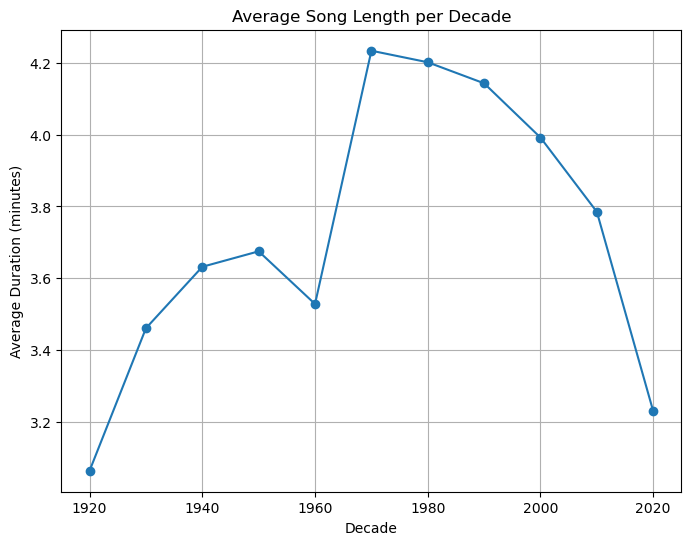

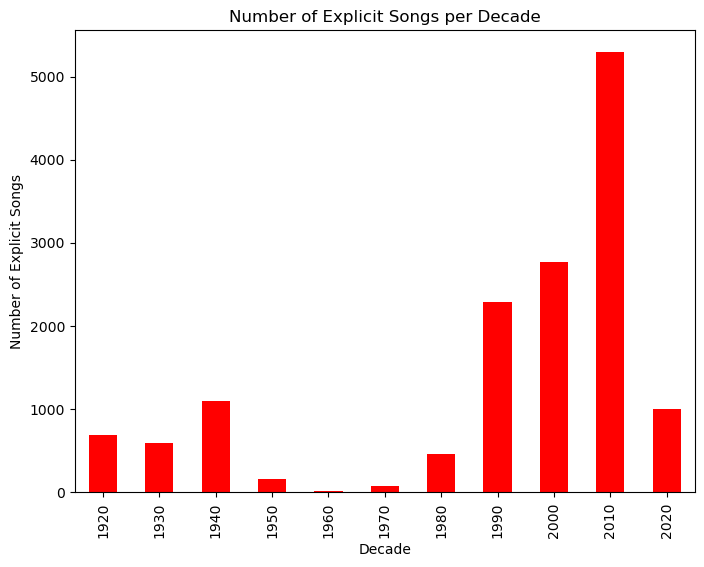

In [97]:
# danceability
avg_danceability_per_decade = df.groupby("decade")["danceability"].mean()
plt.figure(figsize=(8, 6))
avg_danceability_per_decade.plot(kind="line", marker="o", title="Average Danceability per Decade")
plt.xlabel("Decade")
plt.ylabel("Average Danceability")
plt.grid(True)
plt.show()

# duration
avg_duration_per_decade = df.groupby("decade")["duration_ms"].mean() / 60000  # Convert ms to minutes
plt.figure(figsize=(8, 6))
avg_duration_per_decade.plot(kind="line", marker="o", title="Average Song Length per Decade")
plt.xlabel("Decade")
plt.ylabel("Average Duration (minutes)")
plt.grid(True)
plt.show()

# explicit songs per decade
explicit_counts_per_decade = df[df["explicit"] == 1].groupby("decade").size()
plt.figure(figsize=(8, 6))
explicit_counts_per_decade.plot(kind="bar", title="Number of Explicit Songs per Decade", color="red")
plt.xlabel("Decade")
plt.ylabel("Number of Explicit Songs")
plt.show()


There are some interesting visualisations here. We see that danceability (Spotify define this as how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity) seems to increase as the decades go on whilst song length rises to a 1970 peak and then falls dramatically (possibly correlating with the dying of the cd as the most popular mode of listening and the introduction of streaming).

As I would have expected, it seems we no longer give as much of a **** about explicit lyrics these days. Songs with explicit lyrics have seen a steep increase within the past 20 years. This could be partially attributed to streaming again as artists have more control over their work compared to the previous decades where radio was more dominant.

***
## Random Track Stats:

To bring in some randomisation I created a python programme which, when run, selects a random track from the entire dataset and provides some details about it (name, artist, year, danceability, energy, popularity). The programme is called `random_track.py` and can be run as a command line argument.

**Challenge:** pick a random track and try dance to it. Do you agree with Spotify's danceability rating?

***
## Track Title Analysis:

To demonstrate regular expressions I will analyse the song titles included in this dataset and produce a list of the top 20 words used across the board.

Most Common Words in Song Titles:
the: 22480
i: 12398
in: 11356
you: 10348
a: 9695
of: 7730
no: 7088
me: 6939
s: 6321
to: 6093
love: 5797
my: 4940
remaster: 4786
remastered: 4748
t: 4584
it: 4504
and: 4388
op: 4363
live: 4215
on: 4115


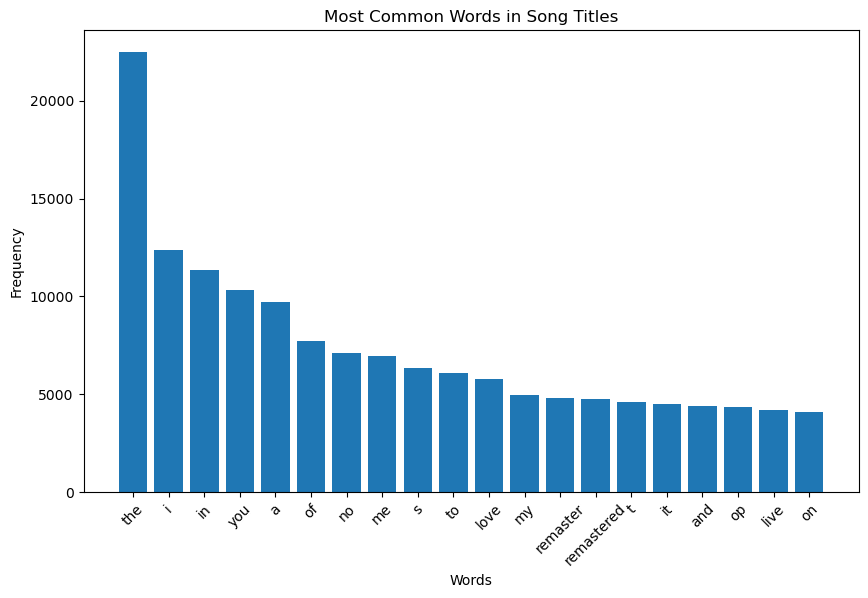

In [98]:
all_titles = df["name"].dropna()
all_words = re.findall(r"\w+", " ".join(all_titles).lower())
word_counts = Counter(all_words)

# Printing the 20 most common words
print("Most Common Words in Song Titles:")
most_common_words = word_counts.most_common(20)
for word, count in most_common_words:
    print(f"{word}: {count}")

# Plotting the top 20 words
words, counts = zip(*most_common_words)
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Most Common Words in Song Titles")
plt.xticks(rotation=45)
plt.show()

This concludes my analysis of this dataset of Spotify tracks. With the large amount of data this dataset contains there is great potential to use it for machine learning. This would provide some interesting avenues to play around with the data even further.

***
## References:

| Author                                 | Title                                                                                                         | Blurb                           |
| :---                                   |    :----:                                                                                                     |          :---:                  |
| Matplotlib | [Matplotlib intro to plotting](https://matplotlib.org/stable/users/explain/quick_start.html) | Matplotlib intro to plotting. |
| Python Docs | [random — Generate pseudo-random numbers](https://docs.python.org/3/library/random.html) | Generating pseudo-random numbers. |
| Python Docs | [Regular Expression HOWTO](https://docs.python.org/3/howto/regex.html) | Python Docs Guide to the regular expressions module. |
| Real Python | [Python's Counter: The Pythonic Way to Count Objects](https://realpython.com/python-counter/) | Real Python's guide to pythons counter |
| Spotify for Developers | [Spotify: Get Track's Audio Features](https://developer.spotify.com/documentation/web-api/reference/get-audio-features) | Spotify's explanations of the audio features columns which are used in this dataset. |
| W3 Schools Functions Guide | [W3 Schools Functions Guide](https://www.w3schools.com/python/python_functions.asp) | W3 Schools guide to functions. |
| W3 Schools Guide to Matplotlib | [W3 Schools Matplotlib Guide](https://www.w3schools.com/python/matplotlib_intro.asp) | W3 Schools guide to Matplotlib. |
| Yamac Eren Ay | [Spotify Dataset 1921-2020, 160k+ Tracks](https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-1921-2020-160k-tracks) | Kaggle dataset which includes data on the audio features of 160k+ Spotify tracks ranging from 1921 to 2020. |

***